In [42]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [44]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
len(coordinates)

2000

In [45]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [46]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
rikitea pf
talesh ir
qeshm ir
upernavik gl
castro cl
qaanaaq gl
albany au
sao filipe cv
rikitea pf
saskylakh ru
jamestown sh
punta arenas cl
lagoa pt
hermanus za
chicama pe
kyshtovka ru
suluq ly
bayonet point us
bolungarvik is
ribas do rio pardo br
arraial do cabo br
taolanaro mg
tuktoyaktuk ca
ahipara nz
belushya guba ru
bogorodskoye ru
kirakira sb
hithadhoo mv
wuwei cn
rikitea pf
mataura pf
constitucion mx
salalah om
manaul ph
sao filipe cv
mar del plata ar
busselton au
tobetsu jp
vaini to
killybegs ie
rikitea pf
karkaralinsk kz
port alfred za
longyearbyen sj
bluff nz
luderitz na
blytheville us
puri in
upernavik gl
yellowknife ca
mataura pf
krasnyy chikoy ru
aklavik ca
albany au
qaanaaq gl
awjilah ly
thompson ca
atuona pf
atuona pf
terme tr
nguiu au
bambous virieux mu
imatra fi
taolanaro mg
ushuaia ar
mahebourg mu
illoqqortoormiut gl
chokurdakh ru
jamestown sh
pangnirtung ca
taolanaro mg
bluff nz
rikitea pf
kamenka ru
kodiak us
brae gb
ushuaia ar
puerto ayora ec
longyear

hithadhoo mv
vao nc
qaqortoq gl
jamestown sh
barrow us
mataura pf
ushuaia ar
cape town za
hilo us
albany au
atuona pf
nandu cn
ripky ua
east london za
qaanaaq gl
tiksi ru
mataura pf
coquimbo cl
faanui pf
sur om
busselton au
albany au
vila do maio cv
karaul ru
punta arenas cl
puerto ayora ec
thompson ca
atuona pf
punta arenas cl
punta arenas cl
storforshei no
guerrero negro mx
taolanaro mg
albany au
cabra ph
bang saphan th
ushuaia ar
tuktoyaktuk ca
foshan cn
tamandare br
punta arenas cl
qaanaaq gl
arraial do cabo br
lazaro cardenas mx
cape town za
busselton au
hilo us
nosy varika mg
rikitea pf
qaanaaq gl
mataura pf
khatanga ru
vaini to
lata sb
sibanicu cu
saskylakh ru
albany au
aktash ru
vaitupu wf
bembereke bj
kuryk kz
mogadishu so
margate za
clyde river ca
kununurra au
axim gh
chuy uy
sistranda no
port alfred za
nanortalik gl
ushuaia ar
niamey ne
barrow us
mianyang cn
taolanaro mg
mugumu tz
taolanaro mg
udachnyy ru
puerto ayora ec
saleaula ws
hobart au
lebu cl
cabo san lucas mx
traver

kapaa us
daye cn
nohar in
illoqqortoormiut gl
kandava lv
oranjemund na
luderitz na
port alfred za
karratha au
berlevag no
tsihombe mg
tuktoyaktuk ca
taolanaro mg
atar mr
bengkulu id
temaraia ki
punta arenas cl
osypenko ua
paciran id
ushuaia ar
butaritari ki
albany au
new norfolk au
torbay ca
thompson ca
bredasdorp za
hobart au
ilulissat gl
busselton au
cartagena del chaira co
dikson ru
mar del plata ar
vaini to
tuktoyaktuk ca
salinopolis br
georgetown sh
gat ly
nogliki ru
yellowknife ca
kavaratti in
souillac mu
manggar id
hobart au
saskylakh ru
zhanaozen kz
avarua ck
magan ru
nanga eboko cm
port alfred za
belmonte br
san patricio mx
fort dodge us
upernavik gl
butaritari ki
haines junction ca
port lincoln au
hobart au
mataram id
vaini to
katsuura jp
kisangani cd
asau tv
bathsheba bb
mar del plata ar
umzimvubu za
estelle us
puerto ayora ec
kodiak us
bethel us
bredasdorp za
le moule gp
kjollefjord no
nalut ly
aykhal ru
klaksvik fo
olhao pt
bosconia co
mehamn no
busselton au
meulaboh id
bl

In [47]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

745

In [48]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [49]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68d380c51476a1a0cf56f03a4d3cf88b


In [50]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Weather Description": city_description,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | talesh
City not found. Skipping...
Processing Record 4 of Set 1 | qeshm
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | chicama
Processing Record 16 of Set 1 | kyshtovka
Processing Record 17 of Set 1 | suluq
Processing Record 18 of Set 1 | bayonet point
Processing Record 19 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 1 | ribas do rio pardo
Processing Record 21 of Set 1 | arraial do cabo
Processing Recor

Processing Record 38 of Set 4 | shenjiamen
Processing Record 39 of Set 4 | suifenhe
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | launceston
Processing Record 44 of Set 4 | biltine
Processing Record 45 of Set 4 | anloga
Processing Record 46 of Set 4 | akdepe
Processing Record 47 of Set 4 | fulton
Processing Record 48 of Set 4 | mrirt
City not found. Skipping...
Processing Record 49 of Set 4 | fare
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | nakhon thai
Processing Record 3 of Set 5 | amahai
Processing Record 4 of Set 5 | oeiras do para
Processing Record 5 of Set 5 | kawana waters
City not found. Skipping...
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | kayes
Processing Record 8 of Set 5 | severo-yeniseyskiy
Processing Record 9 of Set 5 | hornepayne
Process

Processing Record 28 of Set 8 | kapit
Processing Record 29 of Set 8 | ekhabi
Processing Record 30 of Set 8 | kahului
Processing Record 31 of Set 8 | voyvozh
Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | ningbo
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | erzurum
Processing Record 36 of Set 8 | airai
Processing Record 37 of Set 8 | masaurhi
Processing Record 38 of Set 8 | stokmarknes
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | kalabo
Processing Record 41 of Set 8 | ponta do sol
Processing Record 42 of Set 8 | veraval
Processing Record 43 of Set 8 | klaksvik
Processing Record 44 of Set 8 | sembe
Processing Record 45 of Set 8 | adrar
Processing Record 46 of Set 8 | rocha
Processing Record 47 of Set 8 | nioaque
Processing Record 48 of Set 8 | yulara
Processing Record 49 of Set 8 | necochea
Processing Record 50 of Set 8 | lorengau
Processing Record 1 of Set 9 | huicheng
Processing Record 2 of Set 9 | burayda

Processing Record 18 of Set 12 | daye
Processing Record 19 of Set 12 | nohar
Processing Record 20 of Set 12 | kandava
Processing Record 21 of Set 12 | berlevag
Processing Record 22 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 23 of Set 12 | osypenko
Processing Record 24 of Set 12 | paciran
Processing Record 25 of Set 12 | cartagena del chaira
Processing Record 26 of Set 12 | nogliki
Processing Record 27 of Set 12 | manggar
Processing Record 28 of Set 12 | zhanaozen
Processing Record 29 of Set 12 | magan
Processing Record 30 of Set 12 | nanga eboko
Processing Record 31 of Set 12 | fort dodge
Processing Record 32 of Set 12 | mataram
Processing Record 33 of Set 12 | kisangani
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | estelle
Processing Record 36 of Set 12 | le moule
Processing Record 37 of Set 12 | kjollefjord
Processing Record 38 of Set 12 | nalut
Processing Record 39 of Set 12 | olhao
Processing Record 40 of Set 12 | bosconia
Processing

In [51]:
# Check the code generated the expected number of cities.
len(cities)

745

In [54]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Description,Date
0,Busselton,-33.6500,115.3333,58.05,67,100,14.03,AU,overcast clouds,2021-06-19 01:53:12
1,Rikitea,-23.1203,-134.9692,74.84,77,8,23.78,PF,clear sky,2021-06-19 01:53:00
2,Qeshm,26.9581,56.2719,87.69,82,0,9.04,IR,clear sky,2021-06-19 01:55:20
3,Upernavik,72.7868,-56.1549,35.10,69,6,6.67,GL,clear sky,2021-06-19 01:55:20
4,Castro,-24.7911,-50.0119,53.08,98,100,9.44,BR,light rain,2021-06-19 01:42:21
5,Qaanaaq,77.4840,-69.3632,31.03,75,29,4.74,GL,scattered clouds,2021-06-19 01:53:25
6,Albany,42.6001,-73.9662,75.15,68,100,5.82,US,overcast clouds,2021-06-19 01:46:47
7,Sao Filipe,14.8961,-24.4956,72.46,83,4,6.87,CV,clear sky,2021-06-19 01:53:03
8,Saskylakh,71.9167,114.0833,77.14,35,48,12.73,RU,scattered clouds,2021-06-19 01:52:57
9,Jamestown,42.0970,-79.2353,74.52,73,90,13.80,US,overcast clouds,2021-06-19 01:48:35


In [53]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Weather Description"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Weather Description
0,Busselton,AU,2021-06-19 01:53:12,-33.6500,115.3333,58.05,67,100,14.03,overcast clouds
1,Rikitea,PF,2021-06-19 01:53:00,-23.1203,-134.9692,74.84,77,8,23.78,clear sky
2,Qeshm,IR,2021-06-19 01:55:20,26.9581,56.2719,87.69,82,0,9.04,clear sky
3,Upernavik,GL,2021-06-19 01:55:20,72.7868,-56.1549,35.10,69,6,6.67,clear sky
4,Castro,BR,2021-06-19 01:42:21,-24.7911,-50.0119,53.08,98,100,9.44,light rain


In [55]:
# Create the output file (CSV).
output_data_file = "Weather_Database/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

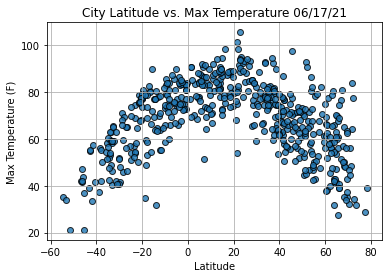

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

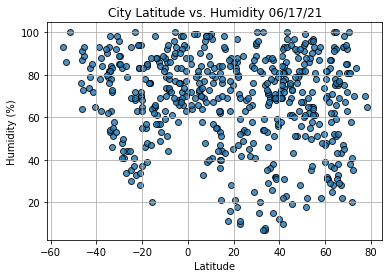

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

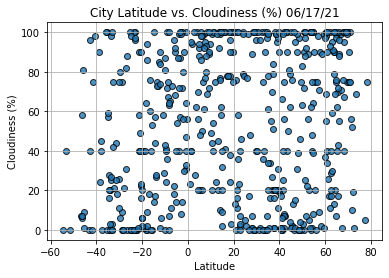

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

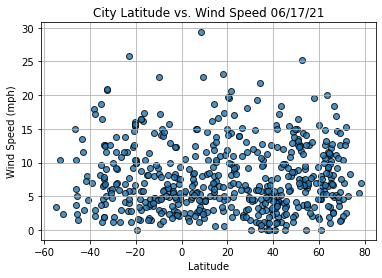

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [28]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [29]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)
print(f'The p-value is : {p_value:.3f}')

y = -0.45x + 92.94
The p-value is : 0.011


In [30]:
# Calculate the regression line "y values" from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

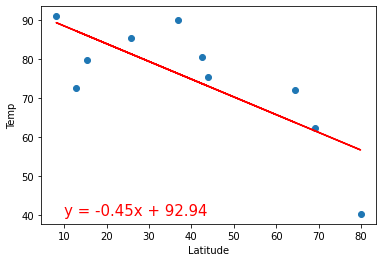

In [31]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

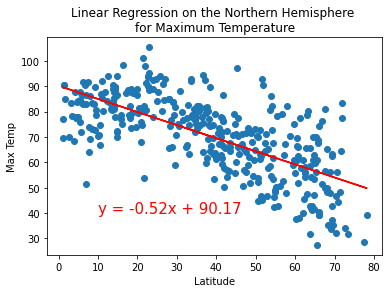

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(10,40))


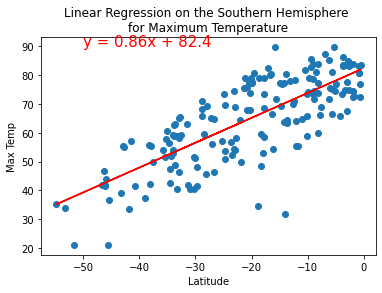

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(-50,90))

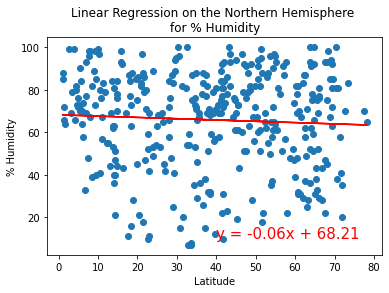

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

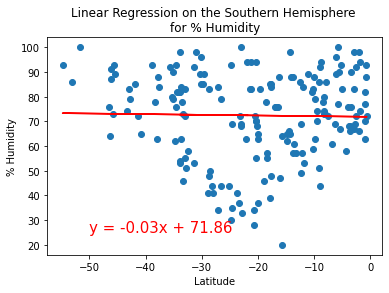

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,25))

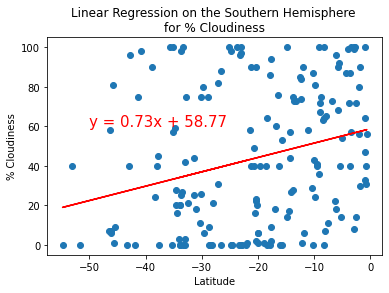

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

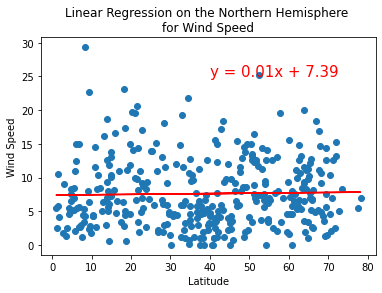

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,25))

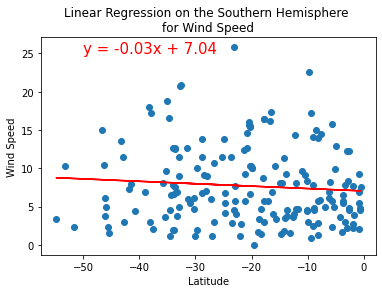

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,25))